In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cx_Oracle
from matplotlib import font_manager,rc
font_path = "/content/drive/MyDrive/L1/Notebooks/dataset/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False
%pwd

'/content'

In [ ]:
# 개별 군집들의 평균 및 시각화 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*','<','>']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

# Preprocessing

In [ ]:
df=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/final_data_set.pkl')

df.reset_index(inplace=True)
df_1=df[['CUSTNO','RESIDENCE','AGEGROUP','GENDER','PURCHAMOUNT','RECEIPTNO','PURCHTIME']][df['spent_less']==0]
df_1

df_1

,CUSTNO,RESIDENCE,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,PURCHTIME
0,1,060,60세이상,M,342400,02857006,17
1,1,060,60세이상,M,78000,02857007,17
2,1,060,60세이상,M,500000,02857020,17
3,1,060,60세이상,M,314640,02947490,12
4,1,060,60세이상,M,406980,02947512,13
...,...,...,...,...,...,...,...
337916,19373,100,25세~29세,F,69000,02959987,17
337917,19373,100,25세~29세,F,17000,02959943,17
337918,19373,100,25세~29세,F,69000,02844688,20
337919,19373,100,25세~29세,F,29000,05366898,14


In [ ]:
df_1.isnull().sum()

CUSTNO            0
RESIDENCE      1442
AGEGROUP          0
GENDER            0
PURCHAMOUNT       0
RECEIPTNO         0
PURCHTIME         0
dtype: int64

## Residence 결측값 치환

In [ ]:
custno_residence=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/custno_residence.pkl')
custno_residence

,CUSTNO,STORENO,RESIDENCE
0,516,2,55
1,940,31,100
2,952,32,100
3,1084,9,100
4,1108,16,500
...,...,...,...
120,19233,37,100
121,19235,2,55
122,19288,1,100
123,19315,1,100


In [ ]:
def get_null_res(x):
    if x['CUSTNO'] not in list(custno_residence['CUSTNO']):
        return x['RESIDENCE']
    for i in range(len(custno_residence)):
        if x['CUSTNO']==custno_residence['CUSTNO'][i]:
            return str(custno_residence['RESIDENCE'][i])
        else : continue
    
df_1['RESIDENCE_new']=df_1.apply(lambda x: get_null_res(x),axis=1)
df_1.drop('RESIDENCE',axis=1,inplace=True)
df_1.rename({'RESIDENCE_new':'RESIDENCE'},axis=1,inplace=True)
# df_1.RESIDENCE=df_1.RESIDENCE.astype(int)
df_1

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,PURCHTIME,RESIDENCE
0,1,60세이상,M,342400,02857006,17,060
1,1,60세이상,M,78000,02857007,17,060
2,1,60세이상,M,500000,02857020,17,060
3,1,60세이상,M,314640,02947490,12,060
4,1,60세이상,M,406980,02947512,13,060
...,...,...,...,...,...,...,...
337916,19373,25세~29세,F,69000,02959987,17,100
337917,19373,25세~29세,F,17000,02959943,17,100
337918,19373,25세~29세,F,69000,02844688,20,100
337919,19373,25세~29세,F,29000,05366898,14,100


In [ ]:
df_1.isnull().sum()

CUSTNO         0
AGEGROUP       0
GENDER         0
PURCHAMOUNT    0
RECEIPTNO      0
PURCHTIME      0
RESIDENCE      0
dtype: int64

## AGEGROUP, GENDER encoding

In [ ]:
np.sort(df_1.AGEGROUP.unique())

array(['19세이하', '20세~24세', '25세~29세', '30세~34세', '35세~39세', '40세~44세',
       '45세~49세', '50세~54세', '55세~59세', '60세이상'], dtype=object)

In [ ]:
df_1['AGEGROUP']=df_1['AGEGROUP'].apply(lambda x: 0 if x=='19세이하'
                                           else 1 if x=='20세~24세'
                                           else 2 if x=='25세~29세'
                                           else 3 if x=='30세~34세'
                                           else 4 if x=='35세~39세'
                                           else 5 if x=='40세~44세'
                                           else 6 if x=='45세~49세'
                                           else 7 if x=='50세~54세'
                                           else 8 if x=='55세~59세'
                                           else 9)
df_1['GENDER']=df_1['GENDER'].apply(lambda x: 0 if x=='M'
                                       else 1)
df_1

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,PURCHTIME,RESIDENCE
0,1,9,0,342400,02857006,17,060
1,1,9,0,78000,02857007,17,060
2,1,9,0,500000,02857020,17,060
3,1,9,0,314640,02947490,12,060
4,1,9,0,406980,02947512,13,060
...,...,...,...,...,...,...,...
337916,19373,2,1,69000,02959987,17,100
337917,19373,2,1,17000,02959943,17,100
337918,19373,2,1,69000,02844688,20,100
337919,19373,2,1,29000,05366898,14,100


## 그룹화 (CUSTNO)

- AGEGROUP : mean 사용, 평균 연령대 산출
    - 19세이하 = 0
    - 20세~24세 = 1
    - 25세~29세 = 2
    - 30세~34세 = 3
    - 35세~39세 = 4
    - 40세~44세 = 5
    - 45세~49세 = 6
    - 50세~54세 = 7
    - 55세~59세 = 8
    - 60세이상 = 9

- GENDER : mean 사용, 여성 비율 산출
    - M = 0
    - F = 1

- PURCHAMOUNT : sum 사용, 해당 고객의 14년-15년 가을시즌 총 구매액 산출 

- RECEIPTNO : len(x.unique()), 중복 없이 고객 당 14년-15년 가을시즌 총 구매 빈도 산출

- PURCHTIME : mode 사용, 해당 고객의 주 거래 시간 산출

- RESIDENCE : mode 사용, 해당 고객의 주 거주지 산출

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167783 entries, 0 to 337920
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CUSTNO       167783 non-null  int64 
 1   AGEGROUP     167783 non-null  int64 
 2   GENDER       167783 non-null  int64 
 3   PURCHAMOUNT  167783 non-null  int64 
 4   RECEIPTNO    167783 non-null  object
 5   PURCHTIME    167783 non-null  int64 
 6   RESIDENCE    167783 non-null  object
dtypes: int64(5), object(2)
memory usage: 10.2+ MB


In [ ]:
aggregations={'AGEGROUP':'mean',
              'GENDER':'mean',
              'PURCHAMOUNT':'sum',
              'RECEIPTNO':lambda x:len(x.unique()),
              'PURCHTIME':lambda x:x.mode()[0],
              'RESIDENCE':lambda x:x.mode()[0]}
df_g=df_1.groupby('CUSTNO').agg(aggregations)
df_g

,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,PURCHTIME,RESIDENCE
CUSTNO,,,,,,
1,9,0,9336600,43,13,060
4,9,1,1961650,18,14,016
8,9,0,566800,8,14,010
9,9,1,28180290,102,15,100
13,9,1,136300,2,15,210
...,...,...,...,...,...,...
19361,6,1,491900,6,17,100
19364,2,1,253600,1,13,210
19371,7,1,148000,1,15,052


In [ ]:
df_g.isnull().sum()

AGEGROUP       0
GENDER         0
PURCHAMOUNT    0
RECEIPTNO      0
PURCHTIME      0
RESIDENCE      0
dtype: int64

## 유통 채널 (Online, Offline) 속성 생성

- offline cahnnel만 이용 = 0
- TOTAL_USE = 0 이 아닌 고객들은 online channel 이용 횟수를 표시 

In [ ]:
channel_grouped=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/channel_grouped.pkl')
channel_grouped

,CHANNEL,CUSNO,TOTAL_USE
0,A_MOBILE/APP,00007,4
1,A_MOBILE/APP,00014,1
2,A_MOBILE/APP,00074,1
3,A_MOBILE/APP,00112,16
4,A_MOBILE/APP,00122,27
...,...,...,...
8819,D_MOBILE/APP,19354,4
8820,D_MOBILE/APP,19355,1
8821,D_MOBILE/APP,19360,1
8822,D_MOBILE/APP,19377,5


In [ ]:
mask=(channel_grouped['CHANNEL']=='A_MOBILE/APP') | (channel_grouped['CHANNEL']=='B_MOBILE/APP') |\
     (channel_grouped['CHANNEL']=='B_ONLINEMALL') 
channel_e=channel_grouped[mask][['CUSNO','TOTAL_USE']]
channel_e.rename({'CUSNO':'CUSTNO'},axis=1,inplace=True)
channel_e['CUSTNO']=channel_e['CUSTNO'].astype('int64')
channel_e['ONLINE']=1
channel_e.drop('TOTAL_USE',axis=1,inplace=True)
channel_e

,CUSTNO,ONLINE
0,7,1
1,14,1
2,74,1
3,112,1
4,122,1
...,...,...
7928,19055,1
7929,19101,1
7930,19118,1
7931,19139,1


In [ ]:
df_g.reset_index(inplace=True)
edf_merge=pd.merge(df_g,channel_e,how='left',on='CUSTNO')
edf_merge['ONLINE'].fillna(0,inplace=True)
edf_merge

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,PURCHTIME,RESIDENCE,ONLINE
0,1,9,0,9336600,43,13,060,0.0
1,4,9,1,1961650,18,14,016,0.0
2,8,9,0,566800,8,14,010,0.0
3,9,9,1,28180290,102,15,100,0.0
4,13,9,1,136300,2,15,210,0.0
...,...,...,...,...,...,...,...,...
9519,19361,6,1,491900,6,17,100,0.0
9520,19364,2,1,253600,1,13,210,0.0
9521,19371,7,1,148000,1,15,052,0.0
9522,19372,4,1,4962200,41,14,100,0.0


In [ ]:
edf_merge.ONLINE.value_counts()

0.0    5723
1.0    3801
Name: ONLINE, dtype: int64

## 경쟁사 이용 여부 속성 생성

- 경쟁사 이용 이력 없음 = 0

- 0 이 아닌 고객은 경쟁사 이용 횟수 (USAGE_DATE의 중복 없는 갯수) 산출

In [ ]:
competitor_filtering=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/competitor_filtering.pkl')
aggregations={'COMPETITOR':'count',
              'USAGE_DATE':lambda x:len(x.unique())}
comp=competitor_filtering.groupby('CUSTNO').agg(aggregations)
comp.reset_index(inplace=True)
comp['USE_COMP']=1
comp.drop(['COMPETITOR','USAGE_DATE'],axis=1,inplace=True)
comp['CUSTNO']=comp['CUSTNO'].astype('int64')
comp

,CUSTNO,USE_COMP
0,1,1
1,2,1
2,4,1
3,7,1
4,8,1
...,...,...
5084,19370,1
5085,19372,1
5086,19375,1
5087,19376,1


In [ ]:
edf_merge1=pd.merge(edf_merge,comp,how='left',on='CUSTNO')
edf_merge1['USE_COMP'].fillna(0,inplace=True)
edf_merge1['ONLINE']=edf_merge1['ONLINE'].astype('int64')
edf_merge1['USE_COMP']=edf_merge1['USE_COMP'].astype('int64')
edf_merge1.rename({'RECEIPTNO':'FREQUENCY','PURCHTIME':'TIME','TOTAL_USE':'CHANNEL'},axis=1,inplace=True)
edf_merge1

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,FREQUENCY,TIME,RESIDENCE,ONLINE,USE_COMP
0,1,9,0,9336600,43,13,060,0,1
1,4,9,1,1961650,18,14,016,0,1
2,8,9,0,566800,8,14,010,0,1
3,9,9,1,28180290,102,15,100,0,0
4,13,9,1,136300,2,15,210,0,0
...,...,...,...,...,...,...,...,...,...
9519,19361,6,1,491900,6,17,100,0,0
9520,19364,2,1,253600,1,13,210,0,0
9521,19371,7,1,148000,1,15,052,0,0
9522,19372,4,1,4962200,41,14,100,0,1


## 멤버십 가입 여부 속성 생성

- 멤버십에 가입되어 있지 않은 고객 = 0

- 0이 아닌 고객은 가입된 멤버십 개수 산출

In [ ]:
mem_df=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/mmembership.pkl')
mem_df

,고객번호,멤버십명,가입년월
0,00011,하이마트,201512
1,00021,하이마트,201506
2,00037,하이마트,201306
3,00043,하이마트,201403
4,00044,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


In [ ]:
# 복수 멤버십 가입한 고객들 존재
len(mem_df['고객번호'].unique())

6498

In [ ]:
aggregations={'멤버십명':lambda x:len(x.unique()),'가입년월':'count'}
mem_g=mem_df.groupby('고객번호').agg(aggregations)
mem_g.drop('가입년월',axis=1,inplace=True)
mem_g.reset_index(inplace=True)
mem_g.rename({'고객번호':'CUSTNO'},axis=1,inplace=True)
mem_g['CUSTNO']=mem_g['CUSTNO'].astype('int64')
mem_g['MEMBERSHIP']=1
mem_g.drop('멤버십명',axis=1,inplace=True)
mem_g

,CUSTNO,MEMBERSHIP
0,11,1
1,21,1
2,37,1
3,43,1
4,44,1
...,...,...
6493,19377,1
6494,19379,1
6495,19380,1
6496,19381,1


In [ ]:
edf_merge2=pd.merge(edf_merge1,mem_g,how='left',on='CUSTNO')
edf_merge2.fillna(0,inplace=True)
edf_merge2['MEMBERSHIP']=edf_merge2['MEMBERSHIP'].astype('int64')
edf_merge2['RESIDENCE']=edf_merge2['RESIDENCE'].astype('int64')
edf_merge2.drop(['TIME'],axis=1,inplace=True)
edf_merge2

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,FREQUENCY,RESIDENCE,ONLINE,USE_COMP,MEMBERSHIP
0,1,9,0,9336600,43,60,0,1,0
1,4,9,1,1961650,18,16,0,1,0
2,8,9,0,566800,8,10,0,1,0
3,9,9,1,28180290,102,100,0,0,0
4,13,9,1,136300,2,210,0,0,0
...,...,...,...,...,...,...,...,...,...
9519,19361,6,1,491900,6,100,0,0,1
9520,19364,2,1,253600,1,210,0,0,1
9521,19371,7,1,148000,1,52,0,0,1
9522,19372,4,1,4962200,41,100,0,1,0


In [ ]:
edf_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9524 entries, 0 to 9523
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CUSTNO       9524 non-null   int64
 1   AGEGROUP     9524 non-null   int64
 2   GENDER       9524 non-null   int64
 3   PURCHAMOUNT  9524 non-null   int64
 4   FREQUENCY    9524 non-null   int64
 5   RESIDENCE    9524 non-null   int64
 6   ONLINE       9524 non-null   int64
 7   USE_COMP     9524 non-null   int64
 8   MEMBERSHIP   9524 non-null   int64
dtypes: int64(9)
memory usage: 744.1 KB


# Clustering

## 분포 확인

- 분포가 왜곡된 속성들이 존재하므로 로그화 후 Standard Scaling 실시

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


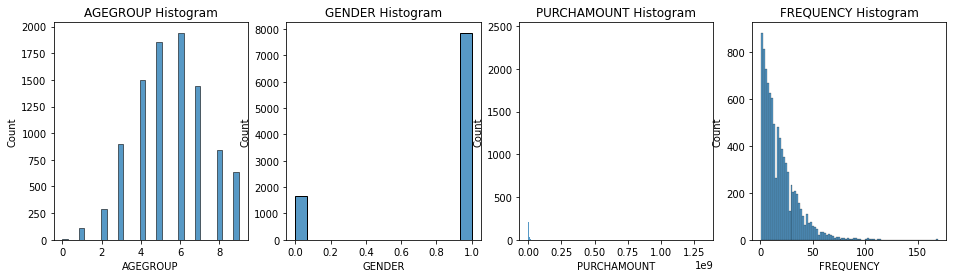

In [ ]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(16,4),nrows=1,ncols=4)

ax1.set_title('AGEGROUP Histogram')
sns.histplot(edf_merge2['AGEGROUP'],ax=ax1)

ax2.set_title('GENDER Histogram')
sns.histplot(edf_merge2['GENDER'],ax=ax2)

ax3.set_title('PURCHAMOUNT Histogram')
sns.histplot(edf_merge2['PURCHAMOUNT'],ax=ax3)

ax4.set_title('FREQUENCY Histogram')
sns.histplot(edf_merge2['FREQUENCY'],ax=ax4)

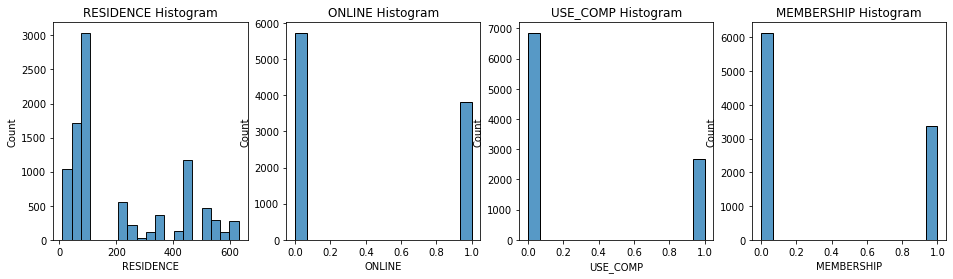

In [ ]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(16,4),nrows=1,ncols=4)

ax1.set_title('RESIDENCE Histogram')
sns.histplot(edf_merge2['RESIDENCE'],ax=ax1)

ax2.set_title('ONLINE Histogram')
sns.histplot(edf_merge2['ONLINE'],ax=ax2)

ax3.set_title('USE_COMP Histogram')
sns.histplot(edf_merge2['USE_COMP'],ax=ax3)

ax4.set_title('MEMBERSHIP Histogram')
sns.histplot(edf_merge2['MEMBERSHIP'],ax=ax4)

## 로그화, Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
edf_log=np.log1p(edf_merge2)
edf_scaled_array=StandardScaler().fit_transform(edf_log)
edf_scaled=pd.DataFrame(edf_scaled_array,columns=edf_log.columns)
edf_scaled

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,FREQUENCY,RESIDENCE,ONLINE,USE_COMP,MEMBERSHIP
0,-8.237428,1.482591,-2.171793,1.344399,1.289635,-0.729871,-0.814961,1.601365,-0.743069
1,-7.311120,1.482591,0.460449,0.459429,0.361136,-1.959114,-0.814961,1.601365,-0.743069
2,-6.716908,1.482591,-2.171793,-0.244808,-0.465047,-2.377935,-0.814961,1.601365,-0.743069
3,-6.610396,1.482591,0.460449,1.971008,2.230062,-0.244733,-0.814961,-0.624467,-0.743069
4,-6.270245,1.482591,0.460449,-1.053193,-1.679764,0.464085,-0.814961,-0.624467,-0.743069
...,...,...,...,...,...,...,...,...,...
9519,1.040824,0.354322,0.460449,-0.325202,-0.742921,-0.244733,-0.814961,-0.624467,1.345770
9520,1.040980,-2.325933,0.460449,-0.701001,-2.128081,0.464085,-0.814961,-0.624467,1.345770
9521,1.041346,0.776722,0.460449,-1.006480,-2.128081,-0.865126,-0.814961,-0.624467,1.345770
9522,1.041398,-0.710040,0.460449,0.985856,1.238198,-0.244733,-0.814961,1.601365,-0.743069


## 군집화, cluster_label 생성

- Silhouette Score를 크게 저하시키지 않으면서 가장 고객을 세분할 수 있는 cluster=5 선택


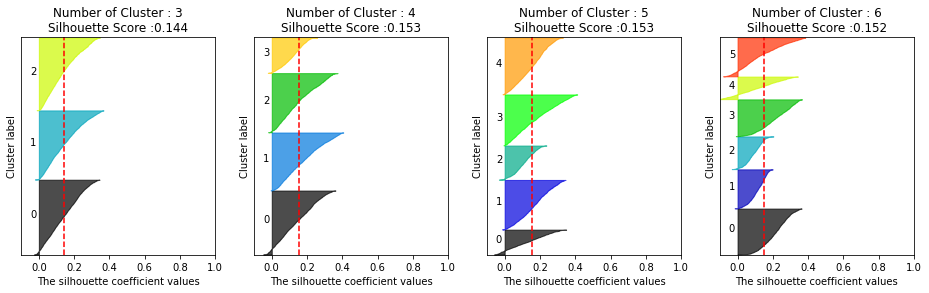

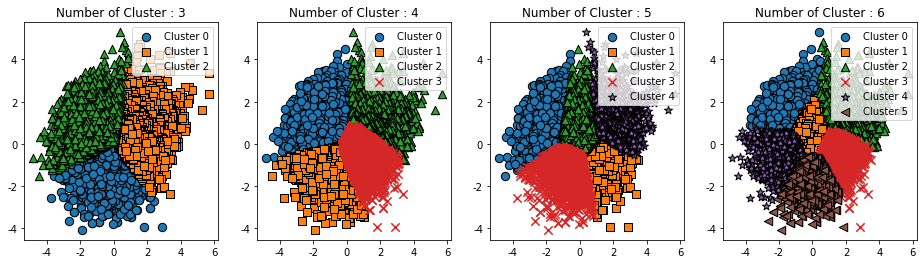

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

visualize_silhouette([3,4,5,6],edf_scaled)
visualize_kmeans_plot_multi([3,4,5,6],edf_scaled)

In [ ]:
from sklearn.cluster import KMeans
labels=KMeans(n_clusters=5,random_state=0).fit_predict(edf_scaled)
edf_merge2['labels']=labels
edf_merge2

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,FREQUENCY,RESIDENCE,ONLINE,USE_COMP,MEMBERSHIP,labels
0,1,9,0,9336600,43,60,0,1,0,0
1,4,9,1,1961650,18,16,0,1,0,0
2,8,9,0,566800,8,10,0,1,0,0
3,9,9,1,28180290,102,100,0,0,0,0
4,13,9,1,136300,2,210,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9519,19361,6,1,491900,6,100,0,0,1,1
9520,19364,2,1,253600,1,210,0,0,1,1
9521,19371,7,1,148000,1,52,0,0,1,3
9522,19372,4,1,4962200,41,100,0,1,0,4


In [ ]:
edf_merge2.to_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/clustering_result(0_1,sales_reduced).pkl')

## 각 cluster 요약

- CUSTNO : 해당 클러스터의 고객 수

- AGEGROUP : 해당 클러스터의 평균 연령대

- GENDER : 해당 클러스터의 여성 비율

- PURCHAMOUNT : 해당 클러스터의 평균 구매 금액

- FREQUENCY : 해당클러스터의 평균 구매 빈도

- RESIDENCE : 해당 클러스터의 주 거주지

- CHANNEL : 해당 클러스터의 온라인채널 이용 비중

- USE_COMP : 해당 클러스터의 경쟁사 이용 비중

- NUMB_MEM : 해당 클러스터의 맴버십 가입 비중

In [ ]:
aggregations={'CUSTNO':'count','AGEGROUP':'mean','GENDER':'mean','PURCHAMOUNT':'mean','FREQUENCY':'mean',
              'RESIDENCE':lambda x:x.mode()[0],'ONLINE':'mean','USE_COMP':'mean','MEMBERSHIP':'mean'}
edf_desc=edf_merge2.groupby('labels').agg(aggregations).sort_values(by='PURCHAMOUNT',ascending=False)
edf_desc

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,FREQUENCY,RESIDENCE,ONLINE,USE_COMP,MEMBERSHIP
labels,,,,,,,,,
4,2496,5.457532,0.995192,7.611978e+06,29.766827,100,0.361779,0.368590,0.039263
0,1100,8.112727,0.874545,5.996197e+06,24.239091,100,0.184545,0.330909,0.218182
2,1506,5.185923,0.000000,2.464022e+06,16.318725,100,0.389774,0.288845,0.367198
1,2181,4.387895,1.000000,1.864409e+06,18.674003,100,0.643741,0.283356,0.981201
3,2241,5.765283,0.995538,2.582477e+05,5.138777,100,0.314145,0.149487,0.159304


In [ ]:
edf_merge2.describe()

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,FREQUENCY,RESIDENCE,ONLINE,USE_COMP,MEMBERSHIP,labels
count,9524.00000,9524.000000,9524.000000,9.524000e+03,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000
mean,9377.23572,5.548719,0.825073,3.564798e+06,18.666632,207.864448,0.399097,0.280554,0.355733,2.299454
std,5461.05676,1.841578,0.379924,1.708957e+07,16.792076,186.881905,0.489738,0.449294,0.478760,1.372995
min,1.00000,0.000000,0.000000,1.500000e+03,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,4716.50000,4.000000,1.000000,2.693900e+05,6.000000,60.000000,0.000000,0.000000,0.000000,1.000000
50%,9157.50000,6.000000,1.000000,8.520700e+05,14.000000,100.000000,0.000000,0.000000,0.000000,2.000000
75%,14022.25000,7.000000,1.000000,3.185240e+06,26.000000,410.000000,1.000000,1.000000,1.000000,4.000000
max,19373.00000,9.000000,1.000000,1.330292e+09,169.000000,630.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
import scipy.stats

# scipy.stats.scoreatpercentile(edf_merge2.PURCHAMOUNT,86)
scipy.stats.scoreatpercentile(edf_merge2.FREQUENCY,59)

18.0